### Likelihood fit to exponential data: can the log-likelihood value use as goodness of fit ? 

This notebook shows how the negative log-likelihood function value at the minimum cannot be used at all as quality of the fit and as a goodness of fit. 

Using the previous example (**LikelihoodFit** notebook) we generate *n* events (e.g. n=20) randomly using the ROOT exponential random number generator and we compute the negative log-likelihood function. 

Afterwards, we generate an alternative data set using instead a Gaussian distribution centered around the exponential parameter *tau*. 
We compute for this data set the same negative log-likelihood as for the exponential data, thus assuming that the data are exponentially distributed. 

You can see that in this case the negative log-likelihood function has a lower value with this alternative data set compared to the negative log-likelihood computed with the exponential data set. 

It is clear that the fit using the alternative gaussian data will not fit better an exponential function that the original one. 



#### 1. Event generation
First we generate n events using an exponential distribution with mean life tau=2

In [1]:
int n = 20;
double tau = 2; 
std::vector<double> x(n);
TRandom3 r(111);
for (int i = 0; i < n; ++i) 
    x[i] = r.Exp(tau)

#### 2. Make an histogram of the generated data

We create a ROOT histogram and we fill with the content of the data vector we have created before. 

We display the histogram using the javascript graphics option (*jsroot on*)

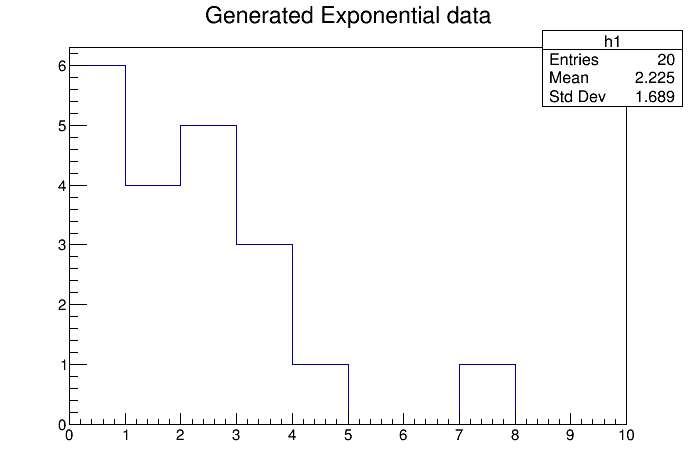

Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


In [2]:
auto h1 = new TH1D("h1","Generated Exponential data",10,0,5*tau);
for (auto x_i : x)  h1->Fill(x_i);
h1->Draw();
gPad->Draw();

#### 3. Calculation of the Log-Likelihood function

We compute now directly the negative log-likelihood function. We assume the data are distributed according to an exponential distribution. 
The negative log-likelihood is then 
$$ NLL ( x_i, \tau ) =  -  \sum_{i-events} PDF(x_i | \tau) = \sum_{i-events} \log \frac{1}{\tau} e ^{- {x_i / \tau} } $$

In [3]:
auto nll = [&](double * p, double *){ double sum = 0; double tau = p[0]; 
                           for (auto x_i : x) {
                               sum += std::log(1./tau * std::exp(-x_i/tau));
                           }
                           return -sum; 
                          };

#### 4. Plot of the negative log-likelihood function 
Plot now the likelihood as function of the exponential parameter (tau)

In [4]:
fnll = new TF1("nll",nll,.1,10,0);

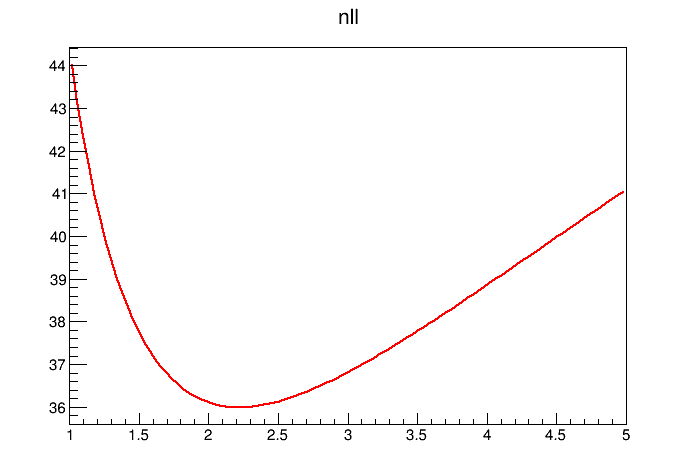

In [5]:
fnll->SetRange(1,5);
fnll->Draw();
gPad->Draw();
// clone the function to plot it later 
auto fnll_exp = fnll->Clone(); 

#### 5. Find the minimum of the NLL
We search now for the minimum of the negative log-likelihood function. We are interested in the value of the parameter tau for which the negative log-likelihood function has a minimum. We use the function provided by ROOT (in the TF1 class) to find the function minimum.

In [6]:
double tau_hat = fnll->GetMinimumX();
double nllExpMin = fnll->Eval(tau_hat);
std::cout << "Estimated value of tau = " << tau_hat << std::endl;
std::cout << "Minimum of nll         = " << nllExpMin << std::endl;

Estimated value of tau = 2.22451
Minimum of nll         = 35.9907


#### 6. Generation of a different data set distributed with a different p.d.f.

Generate now a sample of data which are not distributed as an exponential distribution, but as a Gaussian distribution centered around tau. 
We can show that the exponential likelihood computed with this gaussian distributed data set has in some cases (depending on the random data fluctuations) a lower minimum value that the one obtained from the original exponential data that we have used for fitting.

In [7]:
for (int i = 0; i < n; ++i) 
    x[i] = r.Gaus(tau,0.1*tau_hat);

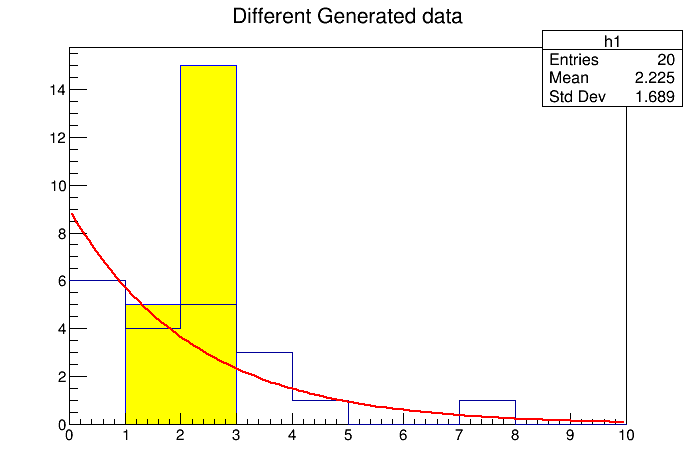

In [8]:
auto h2 = new TH1D("h2","Different Generated data",10,0,5*tau);
for (auto x_i : x)  h2->Fill(x_i);
h2->Draw(); 
h2->SetLineColor(kBlue);
h2->SetFillColor(kYellow);
h1->Draw("SAME");
// we plot also the fitted function at the minimum
// the fitted function is a normalized exponential multiplied by
// a normalization constant equal to nevents * bin width
auto fexp = new TF1("fexp","[Norm]/[tau]*exp(-x/[tau])",0,5*tau);
// 
fexp->SetParameters(n*h1->GetBinWidth(1),tau_hat);
fexp->Draw("SAME");
gPad->Draw();

#### 7.  Compute the NLL with the new data set and  compare with previous one

We compute now the NLL for the new gaussian distribute dataset. 

Note that since we have re-generated different values of x, we can just re-use the same TF1 object created before. It will now be computed on the new data set. The previos NLL it is still available because we have saved a copy of the object (using Clone).
We recalculate also the minimum value of the new NLL. 


In [9]:
double tau_hat2 = fnll->GetMinimumX();
double nllMin2 = fnll->Eval(tau_hat);
std::cout << "Other estimated value of tau = " << tau_hat2 << std::endl;
std::cout << "Other Minimum of nll         = " << nllMin2 << std::endl;

Other estimated value of tau = 2.09041
Other Minimum of nll         = 34.7851


We plot now the new NLL and the old one

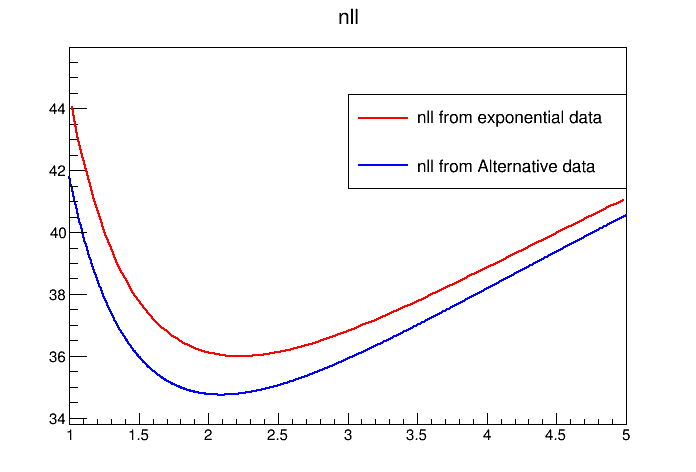

In [10]:
//fnll->SetMinimum(20);
fnll->SetLineColor(kBlue);
fnll->SetNpx(1000);
fnll->SetRange(1,5);
fnll->SetMinimum(std::min(nllMin2,nllExpMin)-1.);
fnll->SetMaximum(std::max(nllMin2,nllExpMin)+10.);
fnll->Draw();
fnll_exp->Draw("same");
legend = new TLegend(.5,.6,.9,.8);
legend->AddEntry(fnll_exp,"nll from exponential data","L");
legend->AddEntry(fnll,"nll from Alternative data","L");
legend->Draw();
gPad->Draw();